In [3]:
#Question 1 - Load Facebook100 Network
import networkx as nx
import os

def load_facebook_gml(file_path):
    """
    Load a Facebook100 network stored in a GML file.
    Returns a NetworkX graph with node attributes.
    """
    try:
        G = nx.read_gml(file_path, label="id")  # Ensure node IDs are preserved
        print(f"✅ Successfully loaded graph from {file_path}")
    except Exception as e:
        print(f"❌ Error loading graph: {e}")
        return None

    # Compute basic statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G)

    print("\n📊 **Graph Statistics**")
    print(f"➡ Nodes: {num_nodes}")
    print(f"➡ Edges: {num_edges}")
    print(f"➡ Density: {density:.6f}")

    # Display sample node attributes
    sample_node = list(G.nodes())[0]
    print(f"\n📝 Sample Node ({sample_node}) Attributes: {G.nodes[sample_node]}")

    return G

# Example usage
file_path = os.path.join("fb100/data", "Bucknell39.gml")  # Load Harvard's Facebook network
G = load_facebook_gml(file_path)


✅ Successfully loaded graph from fb100/data/Bucknell39.gml

📊 **Graph Statistics**
➡ Nodes: 3826
➡ Edges: 158864
➡ Density: 0.021711

📝 Sample Node (0) Attributes: {'label': '0', 'student_fac': 2, 'gender': 1, 'major_index': 23, 'second_major': 29, 'dorm': 0, 'year': 2005, 'high_school': 17001}


✅ Successfully loaded graph from fb100/data/Bucknell39.gml

📊 **Graph Statistics**
➡ Nodes: 3826
➡ Edges: 158864
➡ Density: 0.021711

📝 Sample Node (0) Attributes: {'label': '0', 'student_fac': 2, 'gender': 1, 'major_index': 23, 'second_major': 29, 'dorm': 0, 'year': 2005, 'high_school': 17001}


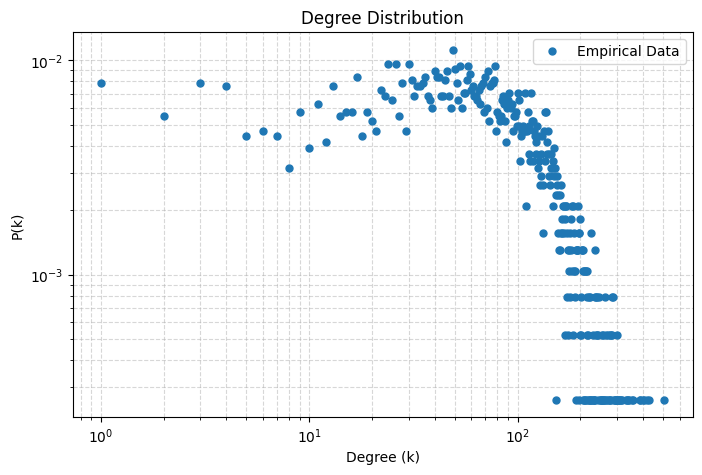

Calculating best minimal value for power law fit
📊 Power-Law Fit Results:
➡ Estimated Alpha: 5.764
➡ Minimum Degree for Power-Law Behavior (xmin): 182.0


In [4]:
#Question 1 - Compute Degree Distribution
import os

# Locate the data directory
data_dir = "fb100/data"

# Select a sample graph (Bucknell39.gml as per previous code)
sample_graph_path = os.path.join(data_dir, "Bucknell39.gml")

# Load the Facebook network
def load_facebook_gml(file_path):
    """Load a Facebook100 network stored in a GML file."""
    try:
        G = nx.read_gml(file_path, label="id")
        print(f"✅ Successfully loaded graph from {file_path}")
    except Exception as e:
        print(f"❌ Error loading graph: {e}")
        return None

    # Compute basic statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G)

    print("\n📊 **Graph Statistics**")
    print(f"➡ Nodes: {num_nodes}")
    print(f"➡ Edges: {num_edges}")
    print(f"➡ Density: {density:.6f}")

    # Display sample node attributes
    sample_node = list(G.nodes())[0]
    print(f"\n📝 Sample Node ({sample_node}) Attributes: {G.nodes[sample_node]}")

    return G

# Load the graph
G = load_facebook_gml(sample_graph_path)

# Now proceed to compute degree distribution
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

def compute_degree_distribution(G):
    """Compute and visualize the degree distribution of a network."""
    degrees = [d for n, d in G.degree()]
    
    # Compute histogram
    degree_counts = np.bincount(degrees)
    k_values = np.nonzero(degree_counts)[0]
    p_k = degree_counts[k_values] / sum(degree_counts)
    
    # Plot degree distribution
    plt.figure(figsize=(8, 5))
    plt.loglog(k_values, p_k, marker="o", linestyle="None", markersize=5, label="Empirical Data")
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    # Fit power-law distribution
    fit = powerlaw.Fit(degrees)
    alpha = fit.power_law.alpha
    xmin = fit.power_law.xmin
    
    print(f"📊 Power-Law Fit Results:")
    print(f"➡ Estimated Alpha: {alpha:.3f}")
    print(f"➡ Minimum Degree for Power-Law Behavior (xmin): {xmin}")

    return degrees, alpha, xmin

# Compute degree distribution
degree_data, alpha_fit, xmin_fit = compute_degree_distribution(G)


🌍 Global Clustering Coefficient: 0.201811


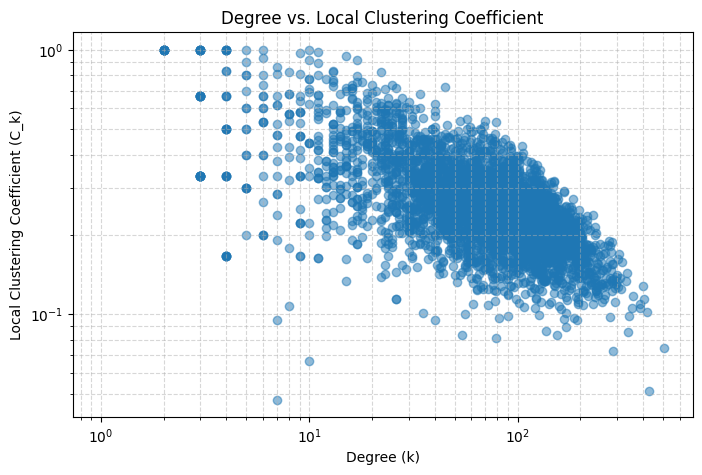

In [5]:
#Question 1 - Compute Clustering Coefficients
def compute_clustering_coefficients(G):
    """
    Compute and visualize clustering coefficients:
    - Global clustering coefficient (transitivity)
    - Local clustering coefficient for each node
    - Plot: Degree vs. Local Clustering Coefficient
    """
    
    # Compute global clustering coefficient (transitivity)
    global_clustering = nx.transitivity(G)
    print(f"🌍 Global Clustering Coefficient: {global_clustering:.6f}")

    # Compute local clustering coefficients
    local_clustering = nx.clustering(G)
    
    # Extract degrees and their corresponding clustering coefficients
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    clustering_values = list(local_clustering.values())

    # Scatter plot: Degree vs. Local Clustering Coefficient
    plt.figure(figsize=(8, 5))
    plt.scatter(degree_values, clustering_values, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (k)")
    plt.ylabel("Local Clustering Coefficient (C_k)")
    plt.title("Degree vs. Local Clustering Coefficient")
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    return global_clustering, local_clustering

# Example usage (Run this after loading your graph G)
global_C, local_C = compute_clustering_coefficients(G)


In [6]:
#Question 1 - Compute Assortativity
def compute_assortativity(G):
    """
    Compute assortativity metrics for the Facebook100 network.
    - Degree assortativity (correlation between node degrees)
    - Attribute assortativity (gender, dorm, major)
    """
    
    # Compute degree assortativity
    degree_assort = nx.degree_assortativity_coefficient(G)
    print(f"📊 Degree Assortativity Coefficient: {degree_assort:.6f}")

    # Compute assortativity by categorical attributes (if they exist in the graph)
    attribute_assort = {}
    for attr in ["gender", "dorm", "major_index"]:
        if attr in list(G.nodes[list(G.nodes())[0]]):  # Check if attribute exists
            assort = nx.attribute_assortativity_coefficient(G, attr)
            attribute_assort[attr] = assort
            print(f"🧩 Assortativity by {attr}: {assort:.6f}")
        else:
            print(f"⚠ Attribute '{attr}' not found in graph.")

    return degree_assort, attribute_assort

# Example usage (Run this after loading your graph G)
degree_assortativity, attr_assortativity = compute_assortativity(G)


📊 Degree Assortativity Coefficient: 0.094507
🧩 Assortativity by gender: 0.095336
🧩 Assortativity by dorm: 0.181180
🧩 Assortativity by major_index: 0.050688


In [7]:
#Question 1 - Compute Path Lengths
def compute_path_lengths(G):
    """
    Compute and display path length statistics:
    - Largest connected component analysis
    - Graph diameter (longest shortest path)
    - Average shortest path length
    """

    # Check if the graph is connected
    if not nx.is_connected(G):
        print("⚠ Graph is not fully connected. Computing on the largest connected component.")
        # Extract the largest connected component (LCC)
        largest_cc = max(nx.connected_components(G), key=len)
        G_lcc = G.subgraph(largest_cc).copy()
    else:
        G_lcc = G

    # Compute graph diameter (longest shortest path)
    diameter = nx.diameter(G_lcc)
    print(f"📏 Graph Diameter: {diameter}")

    # Compute average shortest path length
    avg_path_length = nx.average_shortest_path_length(G_lcc)
    print(f"🔗 Average Shortest Path Length: {avg_path_length:.6f}")

    return diameter, avg_path_length

# Example usage (Run this after loading your graph G)
graph_diameter, avg_path_length = compute_path_lengths(G)


⚠ Graph is not fully connected. Computing on the largest connected component.
📏 Graph Diameter: 6
🔗 Average Shortest Path Length: 2.507092


✅ Successfully loaded graph from fb100/data/Caltech36.gml


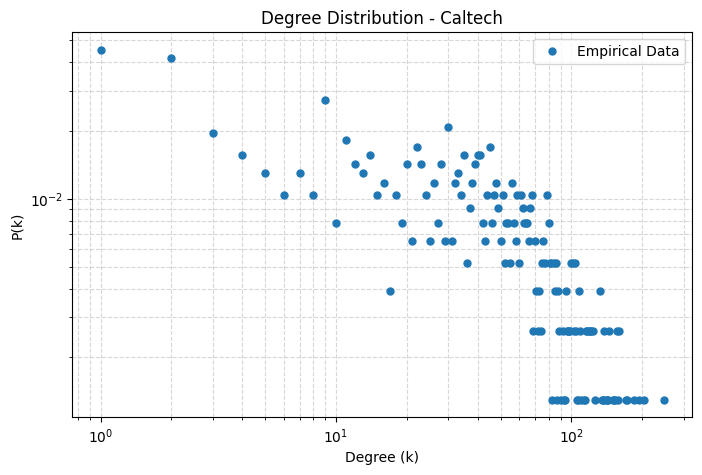

Calculating best minimal value for power law fit
📊 Power-Law Fit for Caltech:
➡ Estimated Alpha: 8.688
➡ Minimum Degree for Power-Law Behavior (xmin): 150.0
✅ Successfully loaded graph from fb100/data/MIT8.gml


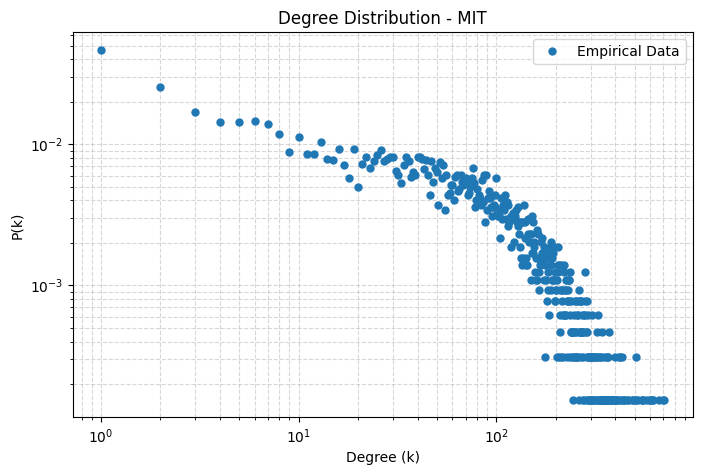

Calculating best minimal value for power law fit
📊 Power-Law Fit for MIT:
➡ Estimated Alpha: 5.274
➡ Minimum Degree for Power-Law Behavior (xmin): 256.0
✅ Successfully loaded graph from fb100/data/Johns Hopkins55.gml


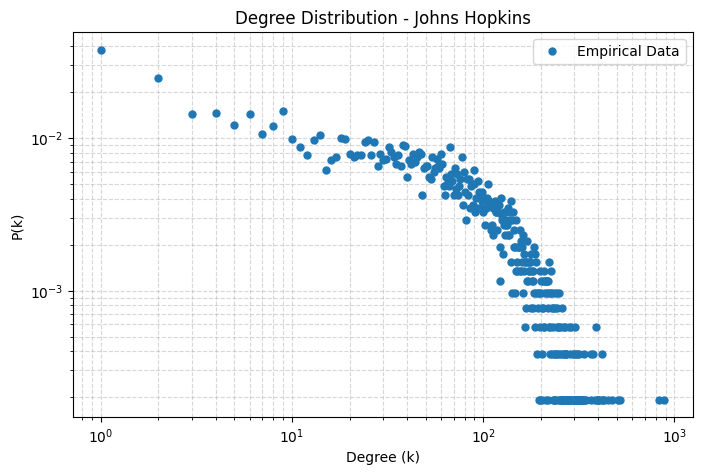

Calculating best minimal value for power law fit
📊 Power-Law Fit for Johns Hopkins:
➡ Estimated Alpha: 5.618
➡ Minimum Degree for Power-Law Behavior (xmin): 209.0


In [8]:
#Question 2 (a)
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import os

# Define file paths (relative to your code structure)
datasets = {
    "Caltech": "fb100/data/Caltech36.gml",
    "MIT": "fb100/data/MIT8.gml",
    "Johns Hopkins": "fb100/data/Johns Hopkins55.gml"
}

def load_facebook_gml(file_path):
    """Load a Facebook100 network stored in a GML file."""
    try:
        G = nx.read_gml(file_path, label="id")
        print(f"✅ Successfully loaded graph from {file_path}")
    except Exception as e:
        print(f"❌ Error loading graph: {e}")
        return None
    return G

def compute_degree_distribution(G, title):
    """Compute and visualize the degree distribution of a network."""
    degrees = [d for n, d in G.degree()]
    
    # Compute histogram
    degree_counts = np.bincount(degrees)
    k_values = np.nonzero(degree_counts)[0]
    p_k = degree_counts[k_values] / sum(degree_counts)
    
    # Plot degree distribution
    plt.figure(figsize=(8, 5))
    plt.loglog(k_values, p_k, marker="o", linestyle="None", markersize=5, label="Empirical Data")
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title(f"Degree Distribution - {title}")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    # Fit power-law distribution
    fit = powerlaw.Fit(degrees)
    alpha = fit.power_law.alpha
    xmin = fit.power_law.xmin
    
    print(f"📊 Power-Law Fit for {title}:")
    print(f"➡ Estimated Alpha: {alpha:.3f}")
    print(f"➡ Minimum Degree for Power-Law Behavior (xmin): {xmin}")

    return degrees, alpha, xmin

# Process each dataset
for network_name, file_path in datasets.items():
    G = load_facebook_gml(file_path)
    if G:
        compute_degree_distribution(G, network_name)


In [9]:
#Question 2 (b)
def compute_clustering_and_density(G, title):
    """
    Compute and display clustering and density metrics for a given network.
    - Global clustering coefficient (transitivity)
    - Mean local clustering coefficient
    - Edge density
    """

    # Compute global clustering coefficient (transitivity)
    global_clustering = nx.transitivity(G)

    # Compute mean local clustering coefficient
    local_clustering = nx.clustering(G)
    mean_local_clustering = sum(local_clustering.values()) / len(local_clustering)

    # Compute edge density
    density = nx.density(G)

    # Print results
    print(f"\n📊 Clustering & Density Analysis - {title}")
    print(f"🌍 Global Clustering Coefficient: {global_clustering:.6f}")
    print(f"📎 Mean Local Clustering Coefficient: {mean_local_clustering:.6f}")
    print(f"🔗 Edge Density: {density:.6f}")

    return global_clustering, mean_local_clustering, density

# Process each dataset
for network_name, file_path in datasets.items():
    G = load_facebook_gml(file_path)
    if G:
        compute_clustering_and_density(G, network_name)


✅ Successfully loaded graph from fb100/data/Caltech36.gml

📊 Clustering & Density Analysis - Caltech
🌍 Global Clustering Coefficient: 0.291283
📎 Mean Local Clustering Coefficient: 0.409294
🔗 Edge Density: 0.056404
✅ Successfully loaded graph from fb100/data/MIT8.gml

📊 Clustering & Density Analysis - MIT
🌍 Global Clustering Coefficient: 0.180288
📎 Mean Local Clustering Coefficient: 0.271219
🔗 Edge Density: 0.012118
✅ Successfully loaded graph from fb100/data/Johns Hopkins55.gml

📊 Clustering & Density Analysis - Johns Hopkins
🌍 Global Clustering Coefficient: 0.193161
📎 Mean Local Clustering Coefficient: 0.268393
🔗 Edge Density: 0.013910


✅ Successfully loaded graph from fb100/data/Caltech36.gml


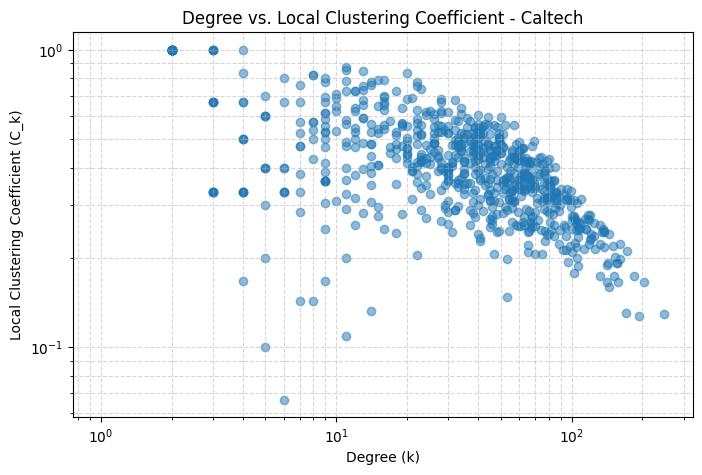

✅ Successfully loaded graph from fb100/data/MIT8.gml


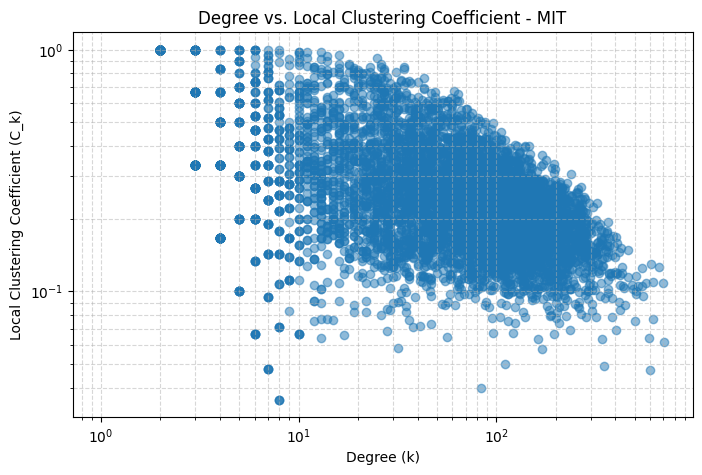

✅ Successfully loaded graph from fb100/data/Johns Hopkins55.gml


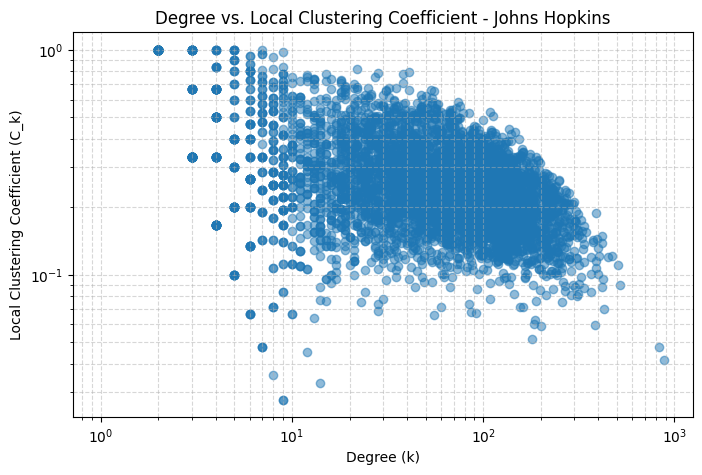

In [10]:
#Question 2 (c)
def plot_degree_vs_clustering(G, title):
    """
    Generate a scatter plot of degree vs. local clustering coefficient for a given network.
    """
    
    # Compute degree and local clustering coefficients
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)

    # Extract values
    degree_values = list(degrees.values())
    clustering_values = list(clustering_coeffs.values())

    # Scatter plot
    plt.figure(figsize=(8, 5))
    plt.scatter(degree_values, clustering_values, alpha=0.5)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (k)")
    plt.ylabel("Local Clustering Coefficient (C_k)")
    plt.title(f"Degree vs. Local Clustering Coefficient - {title}")
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

# Process each dataset
for network_name, file_path in datasets.items():
    G = load_facebook_gml(file_path)
    if G:
        plot_degree_vs_clustering(G, network_name)

In [ ]:
#Question 3 (step 1)
# Define attributes to analyze
import networkx as nx
import os

# Define attributes to analyze
assortativity_attributes = ["student_fac", "major_index", "dorm", "gender"]

# Store graphs
all_graphs = {}  
assortativity_results = {}

def compute_assortativity(G, title):
    """
    Compute assortativity metrics for a university network.
    - Degree assortativity
    - Attribute assortativity (student/faculty, major, dorm, gender)
    """
    
    print(f"\n📊 Assortativity Analysis - {title}")

    # Compute degree assortativity
    degree_assort = nx.degree_assortativity_coefficient(G)
    print(f"🔗 Degree Assortativity: {degree_assort:.6f}")

    # Compute assortativity for categorical attributes
    attribute_assort = {}
    for attr in assortativity_attributes:
        if attr in list(G.nodes[list(G.nodes())[0]]):  # Check if attribute exists
            assort = nx.attribute_assortativity_coefficient(G, attr)
            attribute_assort[attr] = assort
            print(f"🧩 Assortativity by {attr}: {assort:.6f}")
        else:
            print(f"⚠ Attribute '{attr}' not found in graph.")

    return degree_assort, attribute_assort

# Load all 100 networks and compute assortativity
dataset_path = "fb100/data"  # Path where all GML files are stored
#number_of_files = 0  # Counter of files processed
for filename in os.listdir(dataset_path):
    #if number_of_files == 20:  # Maximum number of files to process
     #   break
    #number_of_files += 1  # Increment counter */
    if filename.endswith(".gml"):
        network_name = filename.replace(".gml", "")
        file_path = os.path.join(dataset_path, filename)
        G = nx.read_gml(file_path, label="id")
        
        if G:
            all_graphs[network_name] = G  # Store graph
            assortativity_results[network_name] = compute_assortativity(G, network_name)



📊 Assortativity Analysis - Simmons81
🔗 Degree Assortativity: -0.061967
🧩 Assortativity by student_fac: 0.318609
🧩 Assortativity by major_index: 0.061288
🧩 Assortativity by dorm: 0.167731
🧩 Assortativity by gender: 0.004645

📊 Assortativity Analysis - Emory27
🔗 Degree Assortativity: 0.066328
🧩 Assortativity by student_fac: 0.393950
🧩 Assortativity by major_index: 0.034533
🧩 Assortativity by dorm: 0.175942
🧩 Assortativity by gender: 0.076641

📊 Assortativity Analysis - Rice31
🔗 Degree Assortativity: 0.064862
🧩 Assortativity by student_fac: 0.357517
🧩 Assortativity by major_index: 0.048033
🧩 Assortativity by dorm: 0.416017
🧩 Assortativity by gender: 0.027164

📊 Assortativity Analysis - Harvard1
🔗 Degree Assortativity: 0.145055
🧩 Assortativity by student_fac: 0.542625
🧩 Assortativity by major_index: 0.049677
🧩 Assortativity by dorm: 0.125677
🧩 Assortativity by gender: 0.045270

📊 Assortativity Analysis - Northeastern19
🔗 Degree Assortativity: 0.068171
🧩 Assortativity by student_fac: 0.273

In [ ]:
#Question 3 (step 2)
import seaborn as sns

def plot_assortativity_trends(assortativity_results, graph_sizes):
    """
    Generate visualizations for assortativity trends:
    - Scatter plot: Assortativity vs. Network size (log-linear)
    - Histogram: Distribution of assortativity values per attribute
    """
    
    # Extract network names and assortativity values
    network_names = list(assortativity_results.keys())
    
    # Initialize assortativity storage
    assortativity_data = {attr: [] for attr in ["degree", "student_fac", "major_index", "dorm", "gender"]}

    for network, (degree_assort, attr_assort) in assortativity_results.items():
        assortativity_data["degree"].append(degree_assort)
        for attr in attr_assort:
            assortativity_data[attr].append(attr_assort[attr])

    # Scatter plot: Assortativity vs. Network size
    plt.figure(figsize=(10, 6))
    for attr, values in assortativity_data.items():
        plt.scatter(graph_sizes, values, label=attr, alpha=0.7)
    plt.xscale("log")
    plt.xlabel("Network Size (N)")
    plt.ylabel("Assortativity")
    plt.title("Assortativity vs. Network Size")
    plt.axhline(y=0, color="black", linestyle="--", alpha=0.5, label="No Assortativity (r=0)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()    
    for attr, values in assortativity_data.items():
        plt.scatter(graph_sizes, values, label=attr, alpha=0.7)
        plt.xscale("log")
        plt.xlabel("Network Size (N)")
        plt.ylabel("Assortativity")
        plt.title("Assortativity vs. Network Size")
        plt.axhline(y=0, color="black", linestyle="--", alpha=0.5, label="No Assortativity (r=0)")
        plt.legend()
        plt.grid(True, which="both", linestyle="--", alpha=0.5)
        plt.show()

    # Density Plot: Assortativity Distribution
    plt.figure(figsize=(14, 6))
    for attr, values in assortativity_data.items():
        sns.kdeplot(values, fill=True, label=attr, alpha=0.6)
    plt.xlabel("Assortativity Coefficient")
    plt.ylabel("Density")
    plt.title("Density Plot of Assortativity Values")
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="No Assortativity (r=0)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    for attr, values in assortativity_data.items():
        sns.kdeplot(values, fill=True, label=attr, alpha=0.6)
        plt.xlabel("Assortativity Coefficient")
        plt.ylabel("Density")
        plt.title("Density Plot of Assortativity Values")
        plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="No Assortativity (r=0)")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

# Extract network sizes after storing graphs
graph_sizes = {network: G.number_of_nodes() for network, G in all_graphs.items()}

# Run the visualization function
plot_assortativity_trends(assortativity_results, list(graph_sizes.values()))


In [40]:
#Question 4(b)
import networkx as nx
from abc import ABC, abstractmethod

class LinkPrediction(ABC):
    """Base class for link prediction methods."""

    def __init__(self, graph):
        self.graph = graph  # The network graph
        self.N = len(graph)  # Number of nodes

    def neighbors(self, v):
        """Return the neighbors of node v."""
        return set(self.graph.neighbors(v))

    @abstractmethod
    def predict(self, u, v):
        """Compute the link prediction score for a node pair."""
        pass

# 1️⃣ Common Neighbors
class CommonNeighbors(LinkPrediction):
    def predict(self, u, v):
        """Return the number of common neighbors between u and v."""
        return len(self.neighbors(u) & self.neighbors(v))

# 2️⃣ Jaccard Index
class JaccardIndex(LinkPrediction):
    def predict(self, u, v):
        """Compute the Jaccard similarity score."""
        N_u, N_v = self.neighbors(u), self.neighbors(v)
        return len(N_u & N_v) / len(N_u | N_v) if len(N_u | N_v) > 0 else 0

# 3️⃣ Adamic/Adar Index
class AdamicAdar(LinkPrediction):
    def predict(self, u, v):
        """Compute the Adamic/Adar score."""
        shared_neighbors = self.neighbors(u) & self.neighbors(v)
        return sum(1 / nx.degree(self.graph, z) for z in shared_neighbors if nx.degree(self.graph, z) > 0)

# Example Usage
def test_link_prediction_methods(G, u, v):
    """Test all implemented link prediction methods for a given node pair."""
    print(f"\n🔍 Testing Link Prediction for ({u}, {v})\n")

    models = {
        "Common Neighbors": CommonNeighbors(G),
        "Jaccard Index": JaccardIndex(G),
        "Adamic/Adar": AdamicAdar(G)
    }

    for name, model in models.items():
        score = model.predict(u, v)
        print(f"{name}: {score:.6f}")

# Load a sample Facebook network (modify the file path accordingly)
G = nx.read_gml("fb100/data/Harvard1.gml", label="id")

# Select two random nodes (modify manually if needed)
test_link_prediction_methods(G, 100, 200)  # Replace with actual node IDs in your dataset


🔍 Testing Link Prediction for (100, 200)

Common Neighbors: 2.000000
Jaccard Index: 0.008547
Adamic/Adar: 0.012644


In [ ]:
#Question 4(c)
import random
import networkx as nx
import numpy as np

def remove_edges(G, fraction=0.1):
    """
    Randomly remove a fraction of edges from the graph.
    Returns the modified graph and the set of removed edges.
    """
    G = G.copy()  # Work on a copy to avoid modifying original graph
    edges = list(G.edges())
    num_remove = int(len(edges) * fraction)
    removed_edges = random.sample(edges, num_remove)

    G.remove_edges_from(removed_edges)
    return G, set(removed_edges)

def predict_links(G, predictor, top_k):
    """
    Compute link prediction scores for all possible edges and return the top-k predictions.
    """
    scores = []
    nodes = list(G.nodes())

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            u, v = nodes[i], nodes[j]
            if not G.has_edge(u, v):  # Only consider non-existing edges
                score = predictor.predict(u, v)
                scores.append(((u, v), score))

    # Sort by score in descending order and return top-k predictions
    scores.sort(key=lambda x: x[1], reverse=True)
    return [pair for pair, _ in scores[:top_k]]

def evaluate_predictions(G_original, G_modified, predictor, top_k):
    """
    Evaluate a link predictor using Precision@k, Recall@k, and Top-k accuracy.
    """
    removed_edges = set(G_original.edges()) - set(G_modified.edges())
    predicted_links = set(predict_links(G_modified, predictor, top_k))

    # Compute evaluation metrics
    true_positives = len(predicted_links & removed_edges)
    precision = true_positives / top_k
    recall = true_positives / len(removed_edges) if len(removed_edges) > 0 else 0
    top_k_accuracy = true_positives / len(removed_edges) if len(removed_edges) > 0 else 0

    return precision, recall, top_k_accuracy

# Load Facebook network and prepare evaluation
G_original = nx.read_gml("fb100/data/Caltech36.gml", label="id")

# Test for different fractions of removed edges
fractions = [0.05, 0.1, 0.15, 0.2]
top_k = 100  # Number of top predictions to evaluate

# Store results
results = {}

for fraction in fractions:
    print(f"\n🔍 Evaluating with {fraction * 100}% edges removed...")
    G_modified, removed_edges = remove_edges(G_original, fraction)

    predictors = {
        "Common Neighbors": CommonNeighbors(G_modified),
        "Jaccard Index": JaccardIndex(G_modified),
        "Adamic/Adar": AdamicAdar(G_modified)
    }

    for name, predictor in predictors.items():
        precision, recall, top_k_acc = evaluate_predictions(G_original, G_modified, predictor, top_k)
        results[(name, fraction)] = (precision, recall, top_k_acc)
        print(f"{name}: Precision@{top_k} = {precision:.4f}, Recall@{top_k} = {recall:.4f}, Top-{top_k} Accuracy = {top_k_acc:.4f}")

In [ ]:
#Question 4 (d)
# Define multiple networks to test
datasets = [
    "fb100/data/UCSC68.gml",
    "fb100/data/Simmons81.gml",
    "fb100/data/Johns Hopkins55.gml",
    "fb100/data/MIT8.gml",
    "fb100/data/Amherst41.gml"
]  # Modify this list as needed

# Store results for comparison
comparison_results = {}

for dataset in datasets:
    print(f"\n🔍 Evaluating on {dataset}...\n")
    G_original = nx.read_gml(dataset, label="id")

    # Select a removal fraction (10% is a balanced choice)
    fraction = 0.10
    G_modified, removed_edges = remove_edges(G_original, fraction)

    predictors = {
        "Common Neighbors": CommonNeighbors(G_modified),
        "Jaccard Index": JaccardIndex(G_modified),
        "Adamic/Adar": AdamicAdar(G_modified)
    }

    results = {}
    for name, predictor in predictors.items():
        precision, recall, top_k_acc = evaluate_predictions(G_original, G_modified, predictor, top_k=100)
        results[name] = (precision, recall, top_k_acc)
        print(f"{name}: Precision@100 = {precision:.4f}, Recall@100 = {recall:.4f}, Top-100 Accuracy = {top_k_acc:.4f}")

    comparison_results[dataset] = results

In [ ]:
#Question 4(d - plot)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_link_prediction_performance(comparison_results):
    """
    Generate scatter plots and density plots to compare link predictor performance.
    """

    # Extract data
    network_sizes = []
    precision_data = {"Common Neighbors": [], "Jaccard Index": [], "Adamic/Adar": []}
    recall_data = {"Common Neighbors": [], "Jaccard Index": [], "Adamic/Adar": []}

    for dataset, results in comparison_results.items():
        network_size = len(nx.read_gml(dataset, label="id").nodes())
        network_sizes.append(network_size)

        for method in results:
            precision_data[method].append(results[method][0])  # Precision@100
            recall_data[method].append(results[method][1])  # Recall@100

    # Scatter Plot: Precision@100 vs. Network Size
    plt.figure(figsize=(10, 6))
    for method in precision_data:
        plt.scatter(network_sizes, precision_data[method], label=method, alpha=0.7)

    plt.xscale("log")
    plt.xlabel("Network Size (N)")
    plt.ylabel("Precision@100")
    plt.title("Precision@100 vs. Network Size")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    # Scatter Plot: Recall@100 vs. Network Size
    plt.figure(figsize=(10, 6))
    for method in recall_data:
        plt.scatter(network_sizes, recall_data[method], label=method, alpha=0.7)

    plt.xscale("log")
    plt.xlabel("Network Size (N)")
    plt.ylabel("Recall@100")
    plt.title("Recall@100 vs. Network Size")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    # Density Plot: Precision@100 Distribution
    plt.figure(figsize=(10, 6))
    for method, values in precision_data.items():
        sns.kdeplot(values, fill=True, label=method, alpha=0.6)
    plt.xlabel("Precision@100")
    plt.ylabel("Density")
    plt.title("Density Plot of Precision@100 Across Networks")
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Baseline")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    for method, values in precision_data.items():
        sns.kdeplot(values, fill=True, label=method, alpha=0.6)
        plt.xlabel("Precision@100")
        plt.ylabel("Density")
        plt.title("Density Plot of Precision@100 Across Networks")
        plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Baseline")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

    # Density Plot: Recall@100 Distribution
    plt.figure(figsize=(10, 6))
    for method, values in recall_data.items():
        sns.kdeplot(values, fill=True, label=method, alpha=0.6)

    plt.xlabel("Recall@100")
    plt.ylabel("Density")
    plt.title("Density Plot of Recall@100 Across Networks")
    plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Baseline")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

    for method, values in recall_data.items():
        sns.kdeplot(values, fill=True, label=method, alpha=0.6)

        plt.xlabel("Recall@100")
        plt.ylabel("Density")
        plt.title("Density Plot of Recall@100 Across Networks")
        plt.axvline(x=0, color="black", linestyle="--", alpha=0.5, label="Baseline")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()
# Run the visualization function
plot_link_prediction_performance(comparison_results)

In [13]:
#Question 5(b)
import networkx as nx
import random

class LabelPropagation:
    """
    Implements the Label Propagation Algorithm (LPA) for node classification.
    """
    
    def __init__(self, graph, labeled_fraction=0.1):
        self.graph = graph
        self.labeled_fraction = labeled_fraction
        self.labels = self.initialize_labels()
    
    def initialize_labels(self):
        """
        Assigns initial labels to a fraction of the nodes randomly.
        Labeled nodes get a unique identifier (simulating known categories),
        while unlabeled nodes remain unassigned.
        """
        nodes = list(self.graph.nodes())
        random.shuffle(nodes)
        
        labeled_nodes = nodes[:int(self.labeled_fraction * len(nodes))]
        labels = {node: random.randint(1, 5) for node in labeled_nodes}  # Random labels (5 categories)
        
        return labels

    def propagate_labels(self, max_iter=20):
        """
        Performs iterative label propagation.
        Each node adopts the most common label from its neighbors.
        """
        nodes = list(self.graph.nodes())

        for _ in range(max_iter):
            new_labels = self.labels.copy()
            for node in nodes:
                if node not in self.labels:  # Unlabeled nodes update
                    neighbors = list(self.graph.neighbors(node))
                    if neighbors:
                        neighbor_labels = [self.labels.get(n) for n in neighbors if n in self.labels]
                        if neighbor_labels:
                            new_labels[node] = max(set(neighbor_labels), key=neighbor_labels.count)  # Most common

            if new_labels == self.labels:
                break  # Stop if convergence is reached

            self.labels = new_labels.copy()

        return self.labels

# Example usage
def test_label_propagation(dataset_path):
    """
    Loads a Facebook100 network, applies label propagation, and displays results.
    """
    print(f"🔍 Loading graph from {dataset_path}...")
    G = nx.read_gml(dataset_path, label="id")

    # Initialize label propagation
    lp = LabelPropagation(G, labeled_fraction=0.1)
    initial_labels = lp.labels.copy()
    final_labels = lp.propagate_labels()

    # Show a sample of results
    sample_nodes = random.sample(list(G.nodes()), 10)
    print("\n📝 Label Propagation Results (Before & After)")
    for node in sample_nodes:
        before = initial_labels.get(node, "Unlabeled")
        after = final_labels.get(node, "Unlabeled")
        print(f"Node {node}: Before = {before}, After = {after}")

# Run for a Facebook100 dataset (Change the path to your dataset)
test_label_propagation("fb100/data/Caltech36.gml")


🔍 Loading graph from fb100/data/Caltech36.gml...

📝 Label Propagation Results (Before & After)
Node 490: Before = Unlabeled, After = 5
Node 577: Before = Unlabeled, After = 3
Node 486: Before = Unlabeled, After = 1
Node 198: Before = Unlabeled, After = 1
Node 23: Before = Unlabeled, After = 4
Node 340: Before = Unlabeled, After = 3
Node 305: Before = Unlabeled, After = 1
Node 167: Before = Unlabeled, After = 5
Node 202: Before = Unlabeled, After = 1
Node 148: Before = Unlabeled, After = 5


In [37]:
#Question 5(c)
import networkx as nx
import random
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

class LabelPropagation:
    """
    Implements the Label Propagation Algorithm (LPA) for node classification.
    """

    def __init__(self, graph, labels, missing_fraction=0.1):
        self.graph = graph
        self.labels = labels
        self.missing_fraction = missing_fraction
        self.original_labels = labels.copy()  # Keep a copy for evaluation
        self.missing_nodes = self.remove_labels()

    def remove_labels(self):
        """
        Randomly removes labels from a fraction of nodes to simulate missing data.
        """
        labeled_nodes = [node for node in self.labels if self.labels[node] is not None]
        num_remove = int(self.missing_fraction * len(labeled_nodes))
        missing_nodes = random.sample(labeled_nodes, num_remove)

        for node in missing_nodes:
            self.labels[node] = None  # Remove label

        return missing_nodes

    def propagate_labels(self, max_iter=20):
        """
        Runs label propagation to recover missing labels.
        """
        nodes = list(self.graph.nodes())

        for _ in range(max_iter):
            new_labels = self.labels.copy()
            for node in self.missing_nodes:  # Only update missing nodes
                neighbors = list(self.graph.neighbors(node))
                if neighbors:
                    neighbor_labels = [self.labels.get(n) for n in neighbors if self.labels.get(n) is not None]
                    if neighbor_labels:
                        new_labels[node] = max(set(neighbor_labels), key=neighbor_labels.count)  # Most common

            if new_labels == self.labels:
                break  # Stop if convergence is reached

            self.labels = new_labels.copy()

        return self.labels

    from sklearn.metrics import accuracy_score, mean_absolute_error

    def evaluate(self):
        """
        Evaluates the accuracy and MAE of the label propagation method.
        Ensures that only nodes with valid predictions are considered.
        """
        true_labels = []
        predicted_labels = []

        for node in self.missing_nodes:
            if self.original_labels[node] is not None and self.labels[node] is not None:
                true_labels.append(self.original_labels[node])
                predicted_labels.append(self.labels[node])

        if len(true_labels) == 0 or len(predicted_labels) == 0:
            raise ValueError("No valid labels to compare. Check label propagation results.")

        accuracy = accuracy_score(true_labels, predicted_labels)
        mae = mean_absolute_error(true_labels, predicted_labels)

        return accuracy, mae


# Example usage
def test_label_recovery(dataset_path, attribute="dorm", missing_fractions=[0.1, 0.2, 0.3]):
    """
    Runs label propagation on a Facebook100 dataset by removing and recovering node attributes.
    """
    print(f"🔍 Loading graph from {dataset_path}...")
    G = nx.read_gml(dataset_path, label="id")

    # Extract attribute labels
    labels = nx.get_node_attributes(G, attribute)

    results = {}
    for fraction in missing_fractions:
        print(f"\n🔻 Removing {int(fraction * 100)}% of '{attribute}' labels and running label propagation...")
        lp = LabelPropagation(G, labels, missing_fraction=fraction)
        recovered_labels = lp.propagate_labels()
        accuracy, mae = lp.evaluate()

        results[fraction] = {"accuracy": accuracy, "mae": mae}
        print(f"✅ Accuracy: {accuracy:.4f}, MAE: {mae:.4f}")

    return results

# Run the experiment on a Facebook100 dataset (Modify the path)
test_label_recovery("fb100/data/Texas84.gml", attribute="gender")


🔍 Loading graph from fb100/data/Texas84.gml...

🔻 Removing 10% of 'gender' labels and running label propagation...
✅ Accuracy: 0.5637, MAE: 0.4539

🔻 Removing 20% of 'gender' labels and running label propagation...
✅ Accuracy: 0.5666, MAE: 0.4478

🔻 Removing 30% of 'gender' labels and running label propagation...
✅ Accuracy: 0.5426, MAE: 0.4688


{0.1: {'accuracy': 0.5636513610118229, 'mae': 0.45394555952708276},
 0.2: {'accuracy': 0.566574839302112, 'mae': 0.4478114478114478},
 0.3: {'accuracy': 0.5426376440460947, 'mae': 0.46875800256081945}}

In [ ]:
#Question 5(d)
import networkx as nx
import random
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error

class LabelPropagation:
    """
    Implements the Label Propagation Algorithm (LPA) for node classification.
    """

    def __init__(self, graph, labels, missing_fraction=0.1):
        self.graph = graph
        self.labels = labels
        self.missing_fraction = missing_fraction
        self.original_labels = labels.copy()  # Keep a copy for evaluation
        self.missing_nodes = self.remove_labels()

    def remove_labels(self):
        """
        Randomly removes labels from a fraction of nodes to simulate missing data.
        """
        labeled_nodes = [node for node in self.labels if self.labels[node] is not None]
        num_remove = int(self.missing_fraction * len(labeled_nodes))
        missing_nodes = random.sample(labeled_nodes, num_remove)

        for node in missing_nodes:
            self.labels[node] = None  # Remove label

        return missing_nodes

    def propagate_labels(self, max_iter=20):
        """
        Runs label propagation to recover missing labels.
        Ensures that at least some missing nodes receive a label.
        """
        nodes = list(self.graph.nodes())

        for _ in range(max_iter):
            new_labels = self.labels.copy()
            for node in self.missing_nodes:  # Only update missing nodes
                neighbors = list(self.graph.neighbors(node))
                if neighbors:
                    neighbor_labels = [self.labels.get(n) for n in neighbors if self.labels.get(n) is not None]
                    if neighbor_labels:
                        new_labels[node] = max(set(neighbor_labels), key=neighbor_labels.count)  # Most common

            if new_labels == self.labels:
                break  # Stop if convergence is reached

            self.labels = new_labels.copy()

        # 🔹 Ensure that at least some missing nodes receive a label
        for node in self.missing_nodes:
            if self.labels[node] is None:
                self.labels[node] = random.choice(list(self.labels.values()))  # Assign a fallback label

        return self.labels
        
    def evaluate(self):
        """
        Evaluates the accuracy and MAE of the label propagation method.
        """
        true_labels = []
        predicted_labels = []

        for node in self.missing_nodes:
            if self.original_labels[node] is not None and self.labels[node] is not None:
                true_labels.append(self.original_labels[node])
                predicted_labels.append(self.labels[node])

        if len(true_labels) == 0 or len(predicted_labels) == 0:
            raise ValueError("No valid labels to compare. Check label propagation results.")

        accuracy = accuracy_score(true_labels, predicted_labels)
        mae = mean_absolute_error(true_labels, predicted_labels)

        return accuracy, mae

# Function to evaluate label propagation for different attributes
def test_label_propagation(dataset_path, attributes=["dorm", "major", "gender"], missing_fractions=[0.1, 0.2, 0.3]):
    """
    Runs label propagation on a Facebook100 dataset by removing and recovering node attributes.
    Evaluates accuracy and MAE for dorm, major, and gender.
    """
    print(f"🔍 Loading graph from {dataset_path}...")
    G = nx.read_gml(dataset_path, label="id")

    results = {}
    for attribute in attributes:
        print(f"\n🔬 Testing Label Propagation for '{attribute}' attribute...")
        labels = nx.get_node_attributes(G, attribute)

        attribute_results = {}
        for fraction in missing_fractions:
            print(f"\n🔻 Removing {int(fraction * 100)}% of '{attribute}' labels and running label propagation...")
            lp = LabelPropagation(G, labels, missing_fraction=fraction)
            recovered_labels = lp.propagate_labels()
            accuracy, mae = lp.evaluate()

            attribute_results[fraction] = {"accuracy": accuracy, "mae": mae}
            print(f"✅ {attribute} → {int(fraction * 100)}% removed: Accuracy = {accuracy:.4f}, MAE = {mae:.4f}")

        results[attribute] = attribute_results

    return results

# Run the evaluation on Texas84 dataset for Dorm, Major, and Gender
test_label_propagation("fb100/data/Texas84.gml", attributes=["dorm", "major_index", "gender"])


🔍 Loading graph from fb100/data/Texas84.gml...

🔬 Testing Label Propagation for 'dorm' attribute...

🔻 Removing 10% of 'dorm' labels and running label propagation...
✅ dorm → 10% removed: Accuracy = 0.6940, MAE = 37.1138

🔻 Removing 20% of 'dorm' labels and running label propagation...
✅ dorm → 20% removed: Accuracy = 0.6885, MAE = 37.6143

🔻 Removing 30% of 'dorm' labels and running label propagation...
✅ dorm → 30% removed: Accuracy = 0.6801, MAE = 39.0608

🔬 Testing Label Propagation for 'major_index' attribute...

🔻 Removing 10% of 'major_index' labels and running label propagation...
✅ major_index → 10% removed: Accuracy = 0.2230, MAE = 155.0132

🔻 Removing 20% of 'major_index' labels and running label propagation...
✅ major_index → 20% removed: Accuracy = 0.1510, MAE = 224.2802

🔻 Removing 30% of 'major_index' labels and running label propagation...
✅ major_index → 30% removed: Accuracy = 0.1089, MAE = 243.0946

🔬 Testing Label Propagation for 'gender' attribute...

🔻 Removing 10

{'dorm': {0.1: {'accuracy': 0.6939785537530933, 'mae': 37.11383007973605},
  0.2: {'accuracy': 0.6885120684387412, 'mae': 37.61426825542316},
  0.3: {'accuracy': 0.6801020408163265, 'mae': 39.060841836734696}},
 'major_index': {0.1: {'accuracy': 0.22298597745394555,
   'mae': 155.01319769040418},
  0.2: {'accuracy': 0.15095492742551567, 'mae': 224.28021390374332},
  0.3: {'accuracy': 0.10885655946911689, 'mae': 243.09456355283308}},
 'gender': {0.1: {'accuracy': 0.5675006873797086, 'mae': 0.44982128127577675},
  0.2: {'accuracy': 0.5636363636363636, 'mae': 0.45133689839572194},
  0.3: {'accuracy': 0.5554846938775511, 'mae': 0.4530612244897959}}}

In [21]:
#Question 6(b) - I
import networkx as nx
import community  # python-louvain package
import matplotlib.pyplot as plt

def detect_communities_louvain(dataset_path):
    """
    Runs the Louvain method for community detection on a Facebook100 network.
    """
    print(f"🔍 Loading graph from {dataset_path}...")
    G = nx.read_gml(dataset_path, label="id")

    # Run Louvain community detection
    print("⚙️ Running Louvain community detection...")
    partition = community.best_partition(G)

    # Count number of communities
    num_communities = len(set(partition.values()))
    print(f"✅ Detected {num_communities} communities.")

    # Assign detected communities to nodes
    nx.set_node_attributes(G, partition, "community")

    return G, partition

# Example usage
dataset_path = "fb100/data/Texas84.gml"  # Change this to your dataset
G, communities = detect_communities_louvain(dataset_path)

# Display a few nodes and their community assignments
sample_nodes = list(communities.keys())[:10]
for node in sample_nodes:
    print(f"Node {node} → Community {communities[node]}")


🔍 Loading graph from fb100/data/Texas84.gml...
⚙️ Running Louvain community detection...
✅ Detected 18 communities.
Node 0 → Community 0
Node 1 → Community 1
Node 2 → Community 2
Node 3 → Community 2
Node 4 → Community 4
Node 5 → Community 1
Node 6 → Community 5
Node 7 → Community 0
Node 8 → Community 0
Node 9 → Community 2


In [22]:
#Question 6(b) - II
import networkx as nx
import community  # python-louvain
from sklearn.metrics import adjusted_rand_score
import numpy as np

def compute_modularity(G, partition):
    """
    Computes modularity score for the detected communities.
    """
    return community.modularity(partition, G)

def compute_ari(true_labels, detected_communities):
    """
    Computes Adjusted Rand Index (ARI) between detected communities and real attributes.
    """
    true_labels_list = list(true_labels.values())
    detected_labels_list = list(detected_communities.values())

    return adjusted_rand_score(true_labels_list, detected_labels_list)

def validate_group_formation(dataset_path, attribute="dorm"):
    """
    Applies Louvain community detection and compares results with actual attribute-based groupings.
    """
    print(f"\n🔍 Loading graph from {dataset_path}...")
    G = nx.read_gml(dataset_path, label="id")

    # Run Louvain community detection
    print("⚙️ Running Louvain community detection...")
    partition = community.best_partition(G)
    
    # Compute modularity
    modularity_score = compute_modularity(G, partition)
    print(f"✅ Modularity Score: {modularity_score:.4f}")

    # Extract ground-truth labels for comparison
    true_labels = nx.get_node_attributes(G, attribute)
    
    # Compute Adjusted Rand Index (ARI)
    ari_score = compute_ari(true_labels, partition)
    print(f"✅ ARI ({attribute}): {ari_score:.4f}")

    return modularity_score, ari_score

# Example usage: Test on multiple datasets for Dorm vs. Major
datasets = ["fb100/data/Texas84.gml", "fb100/data/MIT8.gml", "fb100/data/Simmons81.gml"]

results = {}
for dataset in datasets:
    print(f"\n🏫 Testing on {dataset} for Dorm Affiliation...")
    dorm_modularity, dorm_ari = validate_group_formation(dataset, attribute="dorm")

    print(f"\n🏫 Testing on {dataset} for Major Affiliation...")
    major_modularity, major_ari = validate_group_formation(dataset, attribute="major_index")

    results[dataset] = {
        "Dorm_Modularity": dorm_modularity,
        "Dorm_ARI": dorm_ari,
        "Major_Modularity": major_modularity,
        "Major_ARI": major_ari,
    }

# Print final results
print("\n📊 Final Comparison:")
for dataset, scores in results.items():
    print(f"\n🏫 {dataset}")
    print(f"  - Dorm Modularity: {scores['Dorm_Modularity']:.4f}, ARI: {scores['Dorm_ARI']:.4f}")
    print(f"  - Major Modularity: {scores['Major_Modularity']:.4f}, ARI: {scores['Major_ARI']:.4f}")



🏫 Testing on fb100/data/Texas84.gml for Dorm Affiliation...

🔍 Loading graph from fb100/data/Texas84.gml...
⚙️ Running Louvain community detection...
✅ Modularity Score: 0.3749
✅ ARI (dorm): 0.0214

🏫 Testing on fb100/data/Texas84.gml for Major Affiliation...

🔍 Loading graph from fb100/data/Texas84.gml...
⚙️ Running Louvain community detection...
✅ Modularity Score: 0.3828
✅ ARI (major_index): 0.0123

🏫 Testing on fb100/data/MIT8.gml for Dorm Affiliation...

🔍 Loading graph from fb100/data/MIT8.gml...
⚙️ Running Louvain community detection...
✅ Modularity Score: 0.3919
✅ ARI (dorm): 0.0400

🏫 Testing on fb100/data/MIT8.gml for Major Affiliation...

🔍 Loading graph from fb100/data/MIT8.gml...
⚙️ Running Louvain community detection...
✅ Modularity Score: 0.3804
✅ ARI (major_index): 0.0065

🏫 Testing on fb100/data/Simmons81.gml for Dorm Affiliation...

🔍 Loading graph from fb100/data/Simmons81.gml...
⚙️ Running Louvain community detection...
✅ Modularity Score: 0.4793
✅ ARI (dorm): 0.12

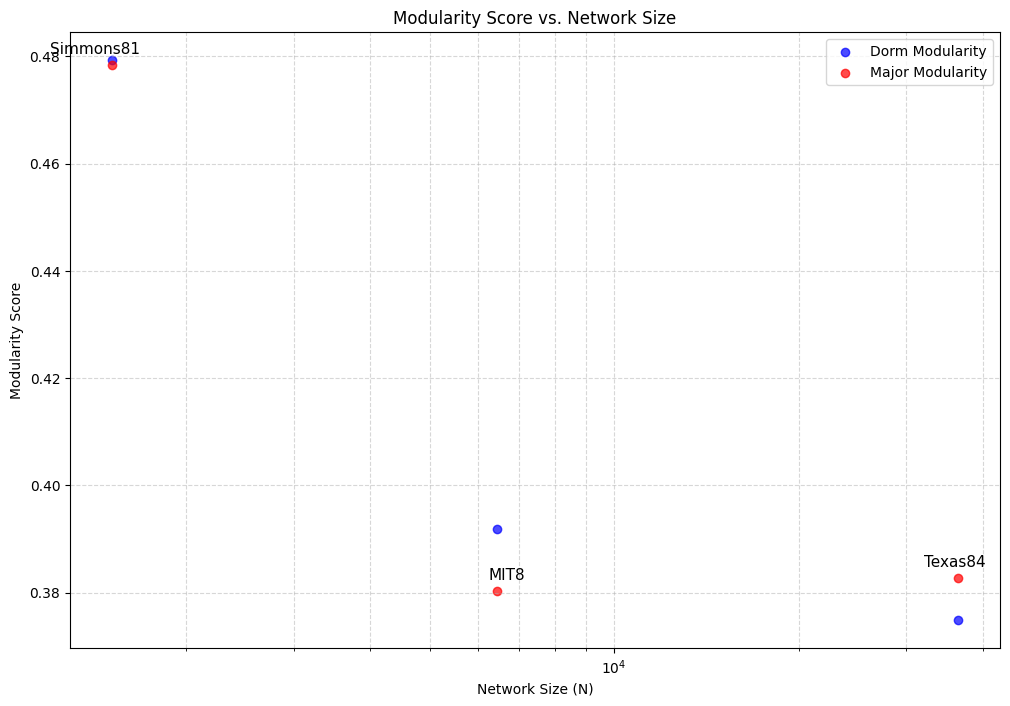

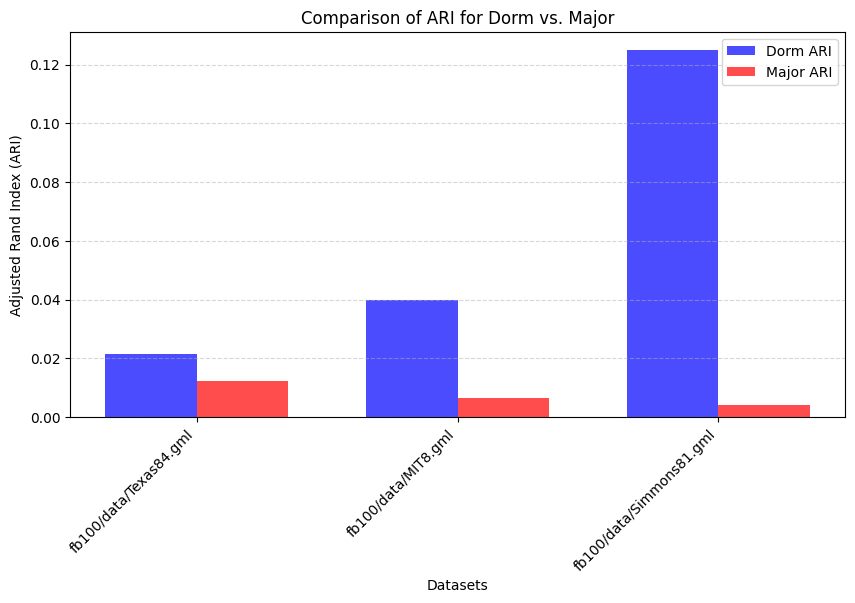

In [ ]:
#Question 6(b) - III
import matplotlib.pyplot as plt
import numpy as np

# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def plot_community_detection_results(results):
    """
    Generates visualizations for community detection results:
    - Scatter plot: Modularity Score vs. Network Size (with university labels)
    - Bar plot: Comparison of ARI (Dorm vs. Major)
    """
    
    # Extract dataset names, sizes, and scores
    dataset_names = list(results.keys())
    network_sizes = [len(nx.read_gml(dataset, label="id").nodes()) for dataset in dataset_names]

    dorm_modularity = [results[dataset]["Dorm_Modularity"] for dataset in dataset_names]
    major_modularity = [results[dataset]["Major_Modularity"] for dataset in dataset_names]
    
    dorm_ari = [results[dataset]["Dorm_ARI"] for dataset in dataset_names]
    major_ari = [results[dataset]["Major_ARI"] for dataset in dataset_names]

    # Scatter Plot: Modularity Score vs. Network Size
    plt.figure(figsize=(12, 8))
    plt.scatter(network_sizes, dorm_modularity, label="Dorm Modularity", color="blue", alpha=0.7)
    plt.scatter(network_sizes, major_modularity, label="Major Modularity", color="red", alpha=0.7)
    
    # Add university labels next to points
    for i, dataset in enumerate(dataset_names):
        # Extract university name from file path             
        plt.annotate(dataset.split("/")[-1].replace(".gml", ""),  
                     (network_sizes[i], major_modularity[i]),
                     textcoords="offset points", xytext=(20,8), ha="right", fontsize=11, color="black")

    plt.xscale("log")
    plt.xlabel("Network Size (N)")
    plt.ylabel("Modularity Score")
    plt.title("Modularity Score vs. Network Size")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.show()

    # Bar Plot: Comparison of ARI for Dorm vs. Major
    x = np.arange(len(dataset_names))
    width = 0.35  # Bar width

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, dorm_ari, width, label="Dorm ARI", color="blue", alpha=0.7)
    plt.bar(x + width/2, major_ari, width, label="Major ARI", color="red", alpha=0.7)

    plt.xticks(x, dataset_names, rotation=45, ha="right")
    plt.xlabel("Datasets")
    plt.ylabel("Adjusted Rand Index (ARI)")
    plt.title("Comparison of ARI for Dorm vs. Major")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

# Run the visualization function using the results from 6(b) - II
plot_community_detection_results(results)


🔍 Running stability analysis on Texas84...


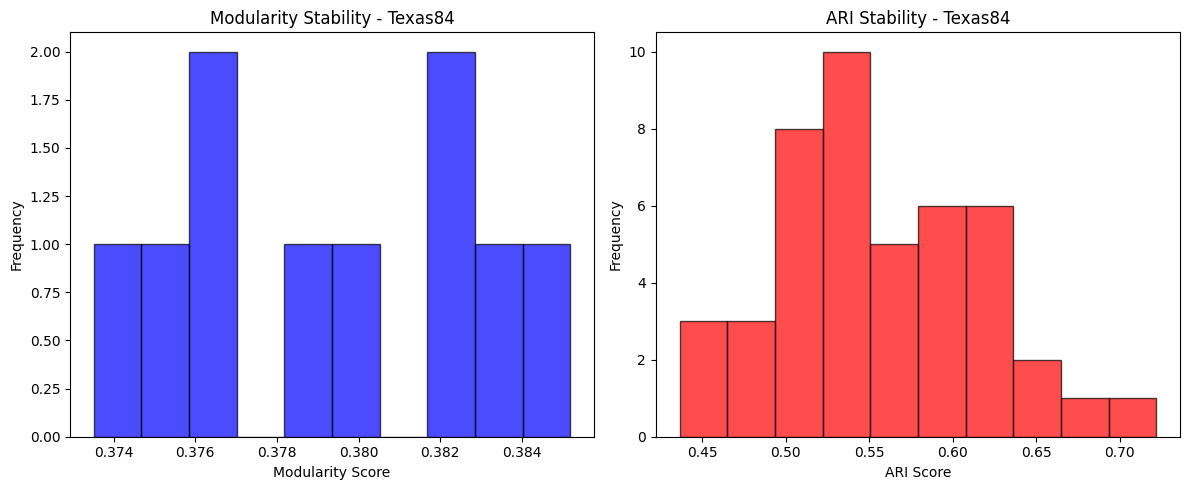

🔍 Running stability analysis on MIT8...


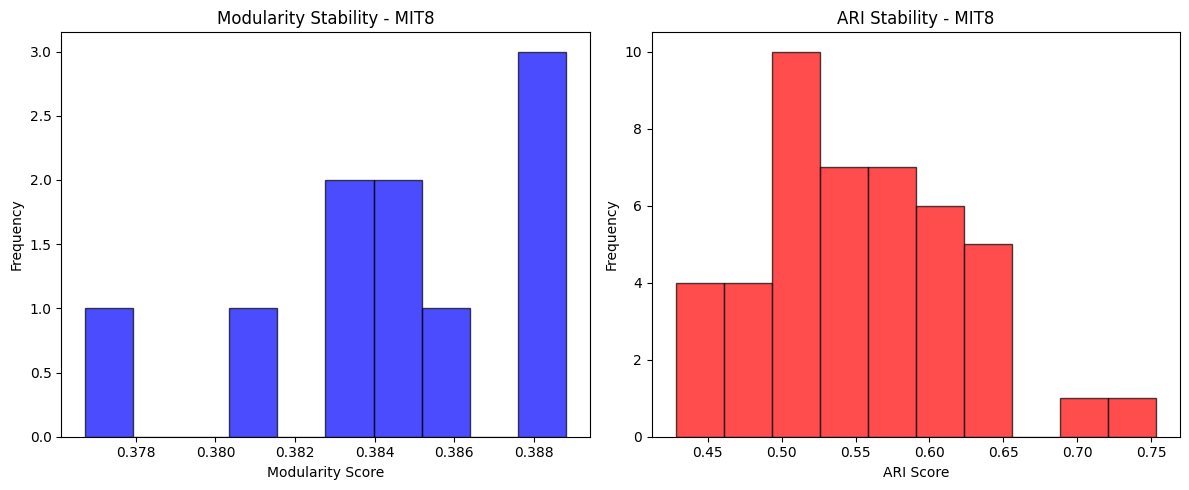

🔍 Running stability analysis on Simmons81...


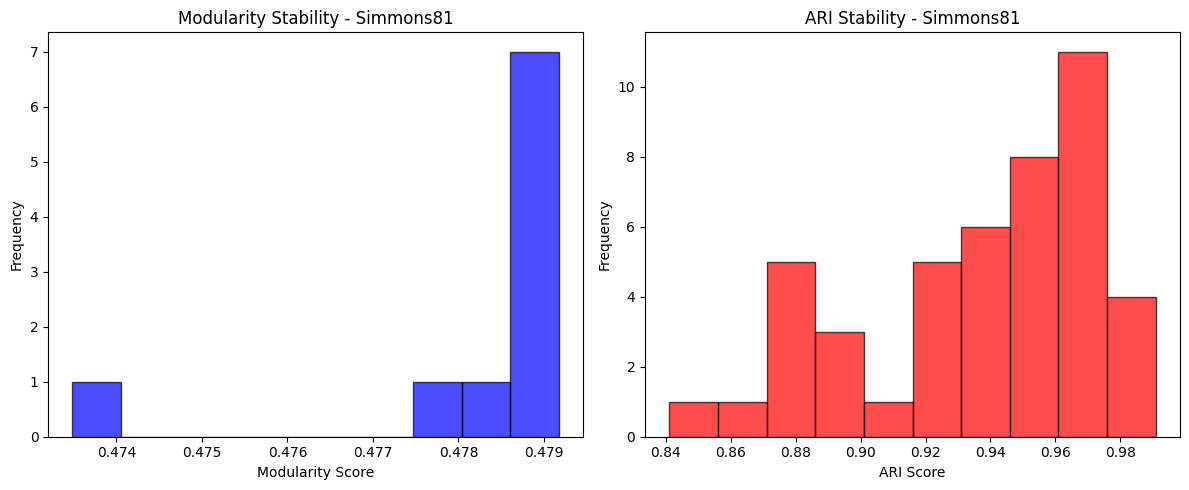

In [33]:
# Question 6 (c)
import networkx as nx
import community as community_louvain
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

def run_louvain_multiple_times(graph, attribute, num_runs=10):
    """
    Runs Louvain community detection multiple times with different random seeds
    and evaluates the stability of detected communities using modularity and ARI.
    
    :param graph: NetworkX graph
    :param attribute: Node attribute for comparison (e.g., 'dorm', 'major_index')
    :param num_runs: Number of times to run Louvain
    :return: Modularity scores and pairwise ARI scores
    """
    modularity_scores = []
    partitions = []
    
    for seed in range(num_runs):
        partition = community_louvain.best_partition(graph, random_state=seed)
        modularity = community_louvain.modularity(partition, graph)
        modularity_scores.append(modularity)
        partitions.append(partition)

    # Compute ARI between different runs
    ari_scores = []
    for i in range(num_runs):
        for j in range(i+1, num_runs):
            labels_i = list(partitions[i].values())
            labels_j = list(partitions[j].values())
            ari = adjusted_rand_score(labels_i, labels_j)
            ari_scores.append(ari)

    return modularity_scores, ari_scores

def plot_stability_results(dataset_name, modularity_scores, ari_scores):
    """
    Plots the stability results for modularity and ARI distributions.
    """
    plt.figure(figsize=(12, 5))
    
    # Modularity Score Distribution
    plt.subplot(1, 2, 1)
    plt.hist(modularity_scores, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel("Modularity Score")
    plt.ylabel("Frequency")
    plt.title(f"Modularity Stability - {dataset_name}")
    
    # ARI Score Distribution
    plt.subplot(1, 2, 2)
    plt.hist(ari_scores, bins=10, alpha=0.7, color='red', edgecolor='black')
    plt.xlabel("ARI Score")
    plt.ylabel("Frequency")
    plt.title(f"ARI Stability - {dataset_name}")
    
    plt.tight_layout()
    plt.show()

# Load datasets and run stability analysis
datasets = {
    "Texas84": "fb100/data/Texas84.gml",
    "MIT8": "fb100/data/MIT8.gml",
    "Simmons81": "fb100/data/Simmons81.gml"
}

results = {}

for dataset_name, dataset_path in datasets.items():
    print(f"🔍 Running stability analysis on {dataset_name}...")
    G = nx.read_gml(dataset_path, label="id")

    # Run Louvain multiple times
    modularity_scores, ari_scores = run_louvain_multiple_times(G, attribute="dorm", num_runs=10)

    # Store results
    results[dataset_name] = {
        "Modularity Scores": modularity_scores,
        "ARI Scores": ari_scores
    }

    # Plot results
    plot_stability_results(dataset_name, modularity_scores, ari_scores)